**D1DAE: Análise Estatística para Ciência de Dados (2021.1)** <br/>
IFSP Campinas

Profs: Ricardo Sovat, Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Probability Distributions

## 1.2. Binomial Distribution

<img src="../imgs/binomial_distribution_ex.png" width=500/>

### Exercise 1

In an admission test for the Data Science specialization, **10 questions** with  **3 possible choices** in each question.<br/>
**Each question scores equally**. Suppose that a candidate have not been prepared for the test. She decided to guess all answers.<br/>
Let the test has the **maximum score of 10** and **cut-off score of 5** for being approved for the next stage.<br/>

Provide the _probability_ that this candidate will **get 5 questions right**, and the _probability_ that she will **advance to the next stage of the test**.<br/><br/>


#### Is this a Binomial experiment?

#### 1. How many trials (n)? (Fixed number of identical trials)

In [35]:
n = 10
n

10

#### 2. Are the trials independent?

Yes. One option chosen for a given question does not influence the chosen answer for the other questions.

#### 3. Are only two outcomes possible per trial?

Yes. The candidate has two possibilities: **hit** or **miss** the question.

#### 4. What is the probability of success (p) and failure (q)?

In [36]:
# question == 'trial'
n_choices_per_question = 3

In [37]:
# Probabilidade de acertar uma questão
p = 1 / n_choices_per_question
p

0.3333333333333333

In [38]:
# Probabilidade de errar uma questão
q = 1 -p
q

0.6666666666666667

Therefore, it is a **Binomial experiment**.

#### What is the total number of events that you want to get successes (x)? 

In [39]:
# Queremos 5 questões corretas entre as 10 respondidas
x = 5
x

5

<br/>

#### Q1. What is the _probability_ that the candidate will get 5 questions right?

##### Solution 1

In [40]:
from scipy.special import comb

In [41]:
probability = comb(n, x) * (p ** x) * (q ** (n - x))
probability

0.13656454808718185

##### Solution 2

In [42]:
from scipy.stats import binom

In [43]:
probability = binom.pmf(x, n, p)
probability

0.13656454808718183

<br/>

#### Q2. How likely is the candidate to pass the test? (What is the _probability_ for that?)
<center><img src="../imgs/binomial_distribution_ex_Q2.png" width=500/></center>

##### Solution 1

*Somando todas as probabilidades (PMF)*

In [44]:
probability = 0.0

# Para cada número de questões acertadas possivel desejado
for x in range(5, 11):
    probability += binom.pmf(x, n, p)

probability

0.2131280800690952

##### Solution 2

*Usando a probabilidade acumulada (CDF)*

$P(x \geq 5) = 1 - P(x \leq 4)$

In [45]:
1 - binom.cdf(4, n, p)

0.21312808006909512

##### Solution 3
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [46]:
# A função abaixo é exatamente igual a:
# 1 - binom.cdf(4, n, p)
binom.sf(4, n, p)

0.21312808006909517

<br/>

### Exercise 2

In the last World Chess Championship, **the proportion of female participants was 60%.** <br/>
**The total of teams, with 12 members, in this year's championship is 30.** <br/>
According to these information, **how many teams should be formed by 8 women?** <br/><br/>



Let's first calculate the probability of a team has 8 women.

#### 1. How many trials (n)? (Fixed number of identical trials)

#### 2. Are the trials independent?

Yes. The gender of each member is independent.

#### 3. Are only two outcomes possible per trial?

Yes: woman (success) and others (failure).

#### 4. What is the probability of success (p) and failure (q)?

#### What is the total number of events that you want to get successes (x)? 

#### Q: How many teams (out of 30) should be formed by 8 women?

##### Solution

#### mean = n * p

<br/>

## 1.3. Poisson Distribution

<img src="../imgs/poisson_distribution_formula.png" width=600/>

### Exercise 1

A restaurant receives **20 orders per hour**. What is the chance that, at a given hour chosen at random, the restaurant will receive **15 orders**?

#### What is the mean number of occurrences per hour? (𝜆)

In [47]:
lambda_ = 20
lambda_

20

#### What is the desired number of occurrences within the period of time? (x)

In [48]:
x = 15
x

15

##### Solution 1

In [49]:
probability = ((np.e ** (-lambda_)) * (lambda_ ** x)) / np.math.factorial(x)
probability

0.0516488535317584

##### Solution 2
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [50]:
from scipy.stats import poisson

In [51]:
probability = poisson.pmf(x, lambda_)
probability

0.05164885353175814

### Exercise 2

Vehicles pass through a junction on a busy road at an average rate of 300 per hour. <br/>

#### **Q1**: Find the probability that none passes in a given minute.

##### The average number of cars per minute (𝜆)

##### What is the desired number of occurrences within the period of time? (x)

#### **Q2**: What is the expected number (average number) passing in two minutes?

#### **Q3**: Find the probability that this expected number actually pass through in a given two-minute period.
Given that the average rate of vehicles that pass through in a busy road in **two minutes** is **10**, which is the probability of passing through **exactly 10 vehicles** in a given two-minute period?

##### The average number of cars per two minutes (𝜆)

##### What is the desired number of occurrences within the period of time? (x)

### Exercise 3

Suppose the **average number of lions** seen on a **1-day safari** is **5**. What is the probability that tourists will see **fewer than four lions** on the next 1-day safari?

#### What is the mean number of lions seen on a 1-day safari? (𝜆)

#### What is the desired number of occurrences within the period of time? (x)
x = 0, 1, 2, or 3

<img src="../imgs/poisson_distribution_ex3.png" width=400/>

##### Solution 1

##### Solution 2

<br/>

## 1.4. Normal Distribution

<img src="../imgs/standard_normal_distribution_formula.png" width=700/>

### Exercise 1

When studying the height of the inhabitants of Pompeia, it was found that its **distribution is approximately normal**, with **mean** of 1.70 m and **standard deviation** of 0.1m.

In [52]:
mean = 1.7
std = 0.1

#### Q1: Probability of a person, selected by chance, is less than 1.8m tall? P(X < 1.8)

In [53]:
x = 1.8
x

1.8

In [54]:
z = (x - mean) / std
z

1.0000000000000009

##### **P(X < 1.8) = P(Z < 1.000)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

Checking the z-score table, **P(Z < 1.000)=0.84134**

##### Solution 2 - Using scipy

In [55]:
from scipy.stats import norm

In [56]:
probability = norm.cdf(1.000)
probability

0.8413447460685429

#### Q2: Probability of a person, selected by chance, is between 1.6m and 1.8m tall? P(1.6 <= X <= 1.8)
P(1.6 <= X <= 1.8) = P(X < 1.8) - P(X < 1.6)

In [57]:
a = 1.6
b = 1.8

In [58]:
z_a = (a - mean) /std
z_b = (b - mean) /std

z_a, z_b

(-0.9999999999999987, 1.0000000000000009)

**P(1.6 <= X <= 1.8) = P(Z < -0.9999) - P(Z < 1.00000)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

In [59]:
prob_a = 0.16109
prob_b = 0.84134

In [60]:
probability = prob_b - prob_a
probability

0.68025

##### Solution 2 - Using scipy

In [61]:
probability = norm.cdf(z_b) - norm.cdf(z_a)
probability

0.6826894921370857

#### Q3: Probability of a person, selected by chance, is over 1.9m tall? P (X >= 1.9)
P(X >= 1.9) = 1 - P(X < 1.9)

In [62]:
x = 1.9
x

1.9

In [63]:
z = (x - mean) / std
z

1.9999999999999996

**P(X >= 1.9) = P(Z >= 1.99999) = 1 - P(Z < 1.99999)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

In [64]:
cdf_z = 0.97725 # considera x = 2
probability = 1 - cdf_z
probability

0.022750000000000048

##### Solution 2 - Using scipy

In [65]:
probability = 1 - norm.cdf(z)
probability

0.02275013194817921

<br/>

# 2. Central Limit Theorem

**Dataset:** https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [66]:
# dataset with data about stroke patients
df = pd.read_csv('../datasets/healthcare-dataset-stroke-data.csv')

In [67]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [68]:
population = df['avg_glucose_level']
population.head()

0    228.69
1    202.21
2    105.92
3    171.23
4    174.12
Name: avg_glucose_level, dtype: float64

In [70]:
population.shape

(5110,)

In [72]:
population_mean = population.mean()
population_mean

106.14767710371804

In [73]:
population_std = population.std()
population_std

45.28356015058203

Text(111.14767710371804, 350, 'Population Mean\n106.15')

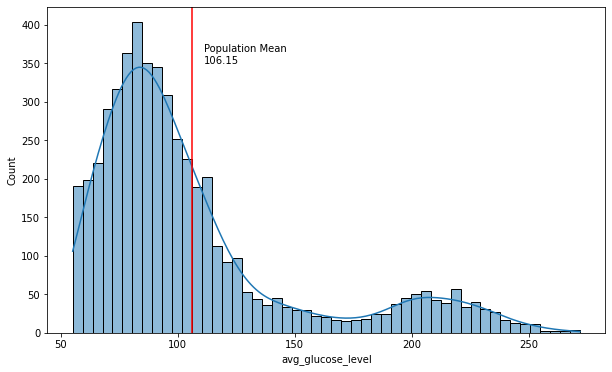

In [77]:
plt.figure(figsize=(10,6))
ax = sns.histplot(population, kde=True)  # the distribution is not normal
ax.axvline(x=population_mean, color='red')
ax.annotate(f'Population Mean\n{population_mean:.2f}', xy=(population_mean + 5, 350))

<br/>

#### The data distribution of a sample does not necessarily follow the **normal distribution**

In [75]:
sample_100 = population.sample(100, random_state=999)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

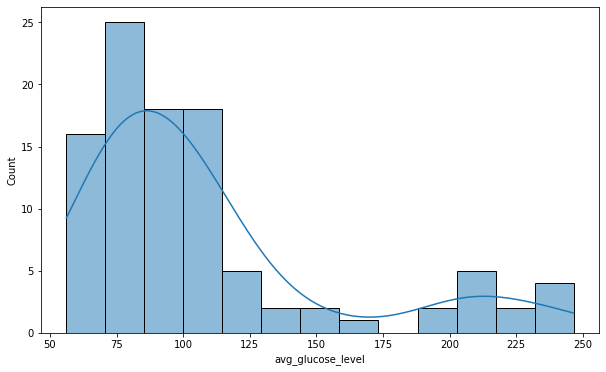

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(sample_100, kde=True)

#### As the sample size increases, the **sampling distribution of the mean** approaches a **normal distribution** with the **sampling distribution’s mean** equals **the population mean**

In [93]:
# Dictionary where each key correspond to a sample size
# For each sample size, there is a dataframe with 1000 samples associated to
samples = {}

for n in [5, 10, 30, 100, 1000]:
    df_sample_size = pd.DataFrame()
    
    for i in range(1000):
        sample = population.sample(n)
        sample.reset_index(drop=True, inplace=True)  # requires this "trick" to work
        df_sample_size[f'Sample #{i}'] = sample
    
    samples[n] = df_sample_size

In [94]:
samples.keys()

dict_keys([5, 10, 30, 100, 1000])

In [95]:
samples[5]

,Sample #0,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5,Sample #6,Sample #7,Sample #8,Sample #9,...,Sample #990,Sample #991,Sample #992,Sample #993,Sample #994,Sample #995,Sample #996,Sample #997,Sample #998,Sample #999
0,128.17,56.34,75.22,92.70,91.63,136.10,74.09,86.07,61.57,95.75,...,111.33,69.40,90.42,201.07,225.47,100.52,83.56,98.09,176.71,93.99
1,162.30,91.09,109.85,55.84,116.93,82.21,97.32,80.63,145.18,65.96,...,113.10,79.82,93.29,91.65,83.27,60.96,106.18,83.42,119.52,96.29
2,96.02,78.11,59.31,85.64,77.45,120.27,221.80,72.76,77.29,111.22,...,149.95,81.31,66.69,203.27,58.48,244.30,189.57,56.85,62.60,71.79
3,60.70,91.54,63.18,79.26,187.88,101.50,145.46,62.44,207.64,95.81,...,110.99,120.58,68.66,72.29,142.82,101.37,62.12,173.97,112.55,82.94
4,97.58,158.89,132.41,84.85,93.24,91.34,196.36,131.19,78.24,240.59,...,82.20,121.14,92.02,201.45,62.66,198.30,78.85,91.89,99.76,97.31


In [96]:
samples[100]

,Sample #0,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5,Sample #6,Sample #7,Sample #8,Sample #9,...,Sample #990,Sample #991,Sample #992,Sample #993,Sample #994,Sample #995,Sample #996,Sample #997,Sample #998,Sample #999
0,95.81,56.12,81.10,205.26,227.23,82.86,83.37,78.18,85.33,196.91,...,145.22,77.66,82.43,93.28,92.11,109.56,202.66,198.32,124.08,81.77
1,107.18,104.12,111.48,70.96,100.29,73.00,62.02,112.95,115.91,88.68,...,108.96,112.98,69.42,77.86,79.66,80.72,86.33,86.09,86.99,109.02
2,66.22,176.78,80.96,66.32,242.30,89.44,99.23,102.89,95.31,77.52,...,55.34,81.59,111.38,77.67,98.14,65.41,88.66,92.49,75.09,112.98
3,119.30,82.90,110.18,213.22,90.11,107.59,93.60,92.21,70.56,123.21,...,76.57,227.28,102.51,61.54,111.99,142.68,73.27,95.16,57.95,76.10
4,58.65,153.34,85.33,231.95,73.76,180.80,94.07,79.13,68.49,153.34,...,62.62,109.56,85.84,78.78,166.38,60.01,74.91,86.24,89.75,124.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,59.48,169.43,93.81,77.99,68.66,108.61,96.84,196.58,126.18,104.77,...,89.14,90.40,149.15,108.82,96.73,145.23,70.16,77.53,65.25,94.47
96,60.98,219.73,68.94,69.61,91.34,67.03,83.85,104.86,82.64,111.68,...,82.63,118.66,94.89,79.57,254.95,84.58,112.69,250.80,118.61,102.15
97,138.02,98.65,112.38,56.96,68.88,96.52,100.81,67.26,69.37,77.65,...,63.33,75.78,127.20,112.44,81.28,82.28,199.83,103.06,228.05,208.17
98,86.19,73.00,92.44,78.18,169.97,107.98,85.60,103.15,231.19,74.16,...,108.51,84.59,67.92,68.52,112.69,163.02,145.15,81.78,86.84,97.34


In [97]:
# mean of each one of the 1000 samples with sample size of 100
samples[100].mean()

Sample #0      112.4485
Sample #1      106.3785
Sample #2      102.0105
Sample #3      108.1286
Sample #4      110.2235
                 ...   
Sample #995    106.8816
Sample #996    105.2355
Sample #997    111.0853
Sample #998    109.2296
Sample #999    107.4298
Length: 1000, dtype: float64

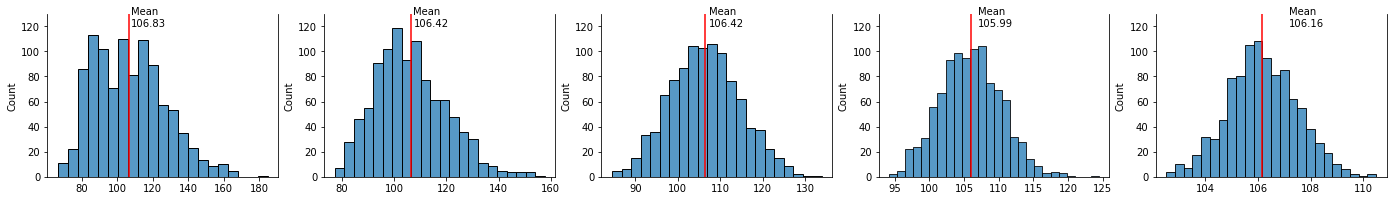

In [98]:
sample_sizes = sorted(samples.keys())

fig, axs = plt.subplots(1, 5, figsize=(24, 3))

for i, n in enumerate(sample_sizes):
    sampling_distribution = samples[n].mean()
    mean_of_sampling_distribution = sampling_distribution.mean()
    
    ax = sns.histplot(sampling_distribution, ax=axs[i])
    axs[i].axvline(x=mean_of_sampling_distribution, color='red')
    ax.annotate(f'Mean\n{mean_of_sampling_distribution:.2f}', xy=(mean_of_sampling_distribution + 1, 120))
    ax.spines['top'].set_visible(False)
    ax.set_ylim([0, 130])

#### Standard error

<img src='../imgs/standard_error.png' width=150 />

In [99]:
population_std

45.28356015058203

In [100]:
sample_sizes

[5, 10, 30, 100, 1000]

In [101]:
print(f'Population standard deviation = {population_std:.2f}\n')

for n in sample_sizes:
    standard_error = population_std / np.sqrt(n)
    print(f'Standard Error for n={n}: {standard_error:.2f}')

Population standard deviation = 45.28

Standard Error for n=5: 20.25
Standard Error for n=10: 14.32
Standard Error for n=30: 8.27
Standard Error for n=100: 4.53
Standard Error for n=1000: 1.43


**The larger the sample size, the smaller the standard error.**

<br/>

# 3. Confidence Interval

<img src='../imgs/confidence_interval.png' width=700 />

- A **90% level of confidence** has 𝜶 = 0.10 and **critical value** of 𝑧𝛼/2 = 1.64.
- A **95% level of confidence** has 𝜶 = 0.05 and **critical value** of 𝑧𝛼/2 = 1.96.
- A **99% level of confidence** has 𝜶 = 0.01 and **critical value** of 𝑧𝛼/2 = 2.58.

In [125]:
from scipy.stats import norm

print(f'Valor critico para alpha = 0.1: {norm.ppf(0.05):.2f}')
print(f'Valor critico para alpha = 0.05: {norm.ppf(0.025):.2f}')
print(f'Valor critico para alpha = 0.01: {norm.ppf(0.005):.2f}')

Valor critico para alpha = 0.1: -1.64
Valor critico para alpha = 0.05: -1.96
Valor critico para alpha = 0.01: -2.58


## Exercise 1
Suppose the heights of the inhabitants of a city are **normally distributed** with **population standard deviation** of 20 cm.
We measure the heights of **40** randomly chosen people, and get a **mean height** of 1.75 m.
Construct a **confidence interval** for the population mean with a **confidence level of 5%**.

### Sample size

In [104]:
# Sample size
n = 40
n

40

### Population standard deviation and sample mean

In [105]:
population_std = 20
population_std

20

In [106]:
sample_mean = 175
sample_mean

175

### Significance level (α)

In [107]:
significance_level = 0.05
significance_level

0.05

### Confidence level (1 - α)

In [108]:
confidence_level = 1 - significance_level
confidence_level

0.95

### Critical value (𝒛𝜶/𝟐)

In [109]:
critical_value = 1.96
critical_value

1.96

### Standard Error

In [111]:
standard_error = population_std / np.sqrt(n)
standard_error

3.162277660168379

### Margin of Error

In [112]:
margin_of_error = critical_value * standard_error
margin_of_error

6.198064213930023

### 95% Confidence Interval

#### Solution 1 - manually

In [113]:
confidence_interval = (
    sample_mean - margin_of_error,
    sample_mean + margin_of_error
)
confidence_interval

(168.80193578606998, 181.19806421393002)

#### Solution 2 - Scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

alpha ==> confidence interval <br/>
loc ==> sample mean  <br/>
scale ==> standard error

In [115]:
from scipy.stats import norm

In [116]:
norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)

(168.8020496769544, 181.1979503230456)

## Exercise 2
Given a dataset from stroke patients, we want to study their mean glucose level. <br/>
For two samples of 100 and 1000 observations, provide a 95% confidence intervals for the following scenarios:

**(a) Known population standard deviation** <br/>
**(b) Unknown population standard deviation**

**Dataset:** https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [126]:
df = pd.read_csv('../datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [127]:
population = df['avg_glucose_level']
population

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [128]:
population_mean = population.mean()
population_mean

106.14767710371804

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

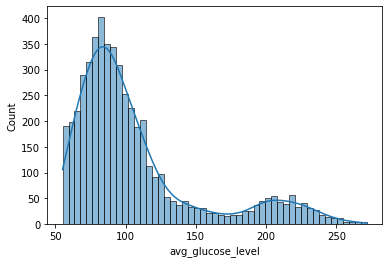

In [129]:
sns.histplot(data=population, kde=True)

#### Population Mean = 106.1476771037182

In [130]:
population_std = population.std()
population_std

45.28356015058203

In [131]:
confidence_level = 0.95
confidence_level

0.95

In [132]:
significance_level = 1 - confidence_level
significance_level

0.050000000000000044

In [133]:
sample_100 = population.sample(100, random_state=999)
sample_100

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
1566    101.43
222     205.35
3075     80.92
580     107.47
1947     65.95
Name: avg_glucose_level, Length: 100, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

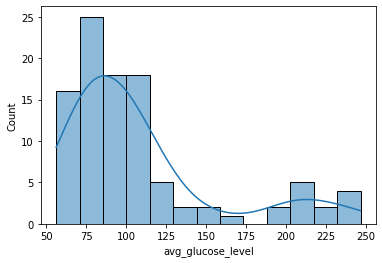

In [134]:
sns.histplot(data=sample_100, kde=True)

In [135]:
sample_1000 = population.sample(1000, random_state=999)
sample_1000

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
3278     84.70
1204    121.19
490      65.24
2650     59.00
34       84.20
Name: avg_glucose_level, Length: 1000, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

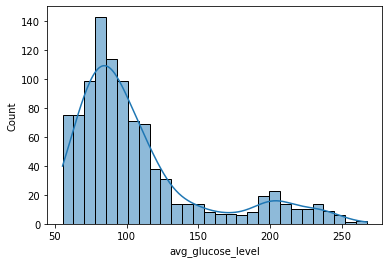

In [136]:
sns.histplot(data=sample_1000, kde=True)

#### **(a) Known population standard deviation, and sample sizes of 100 and 1000**

#### Sample size 100

In [137]:
n = 100
n

100

In [138]:
sample_100_mean = sample_100.mean()
sample_100_mean

107.90570000000007

In [139]:
standard_error_100 = population_std / np.sqrt(n)
standard_error_100

4.528356015058203

In [140]:
norm.interval(alpha=confidence_level, loc=sample_100_mean, scale=standard_error_100)

(99.03028530131067, 116.78111469868946)

#### Sample size 1000

In [141]:
n = 1000
n

1000

In [142]:
sample_1000_mean = sample_1000.mean()
sample_1000_mean

107.67421999999995

In [143]:
standard_error_1000 = population_std / np.sqrt(n)
standard_error_1000

1.4319919063707662

In [144]:
norm.interval(alpha=confidence_level, loc=sample_1000_mean, scale=standard_error_1000)

(104.86756743736039, 110.4808725626395)

#### **(b) Unknown population standard deviation, and sample sizes of 100 and 1000**

#### Sample size 100

In [151]:
n = 100
n

100

In [152]:
sample_100_mean = sample_100.mean()
sample_100_mean

107.90570000000007

In [153]:
sample_100_std = sample_100.std()
sample_100_std

47.96907099613586

In [154]:
standard_error_100 = sample_100_std / np.sqrt(n)
standard_error_100

4.796907099613586

In [156]:
norm.interval(alpha=confidence_level, loc=sample_100_mean, scale=standard_error_100)

(98.50393484757295, 117.30746515242718)

#### Sample size 1000

In [157]:
n = 1000
n

1000

In [158]:
sample_1000_mean = sample_1000.mean()
sample_1000_mean

107.67421999999995

In [159]:
sample_1000_std = sample_1000.std()
sample_1000_std

46.158967265859076

In [160]:
standard_error_1000 = sample_1000_std / np.sqrt(n)
standard_error_1000

1.4596747100126966

In [161]:
norm.interval(alpha=confidence_level, loc=sample_1000_mean, scale=standard_error_1000)

(104.81331013923112, 110.53512986076878)